### Linear Basis Function Models
#### Dummy data

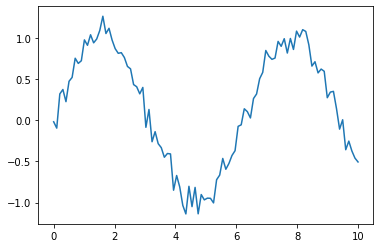

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0,10,100)
w = np.random.randn(100) * 0.1 # variance 0.1, precision=10
Y = np.sin(X) + w

plt.plot(X,Y)

#### 3.1.1 Least square solution P142

The weight is:  [ 1.99614731 -1.17300135  0.2021014  -0.01059788]


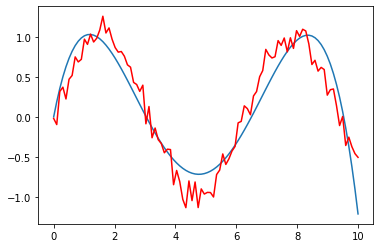

In [6]:
# feature space: (x, x**2, x**3, x**4), W.shape= (1,4)
X_feature = np.array([X, X**2,X**3, X**4])

# maximun likelihood solution
W = np.linalg.inv(X_feature@X_feature.T)@X_feature@Y
print("The weight is: ", W)
plt.plot(X, np.dot(W, X_feature))
plt.plot(X, Y, '-r')
plt.show()

#### Add precision measure, the shape of estimated curve seems more likely to data.

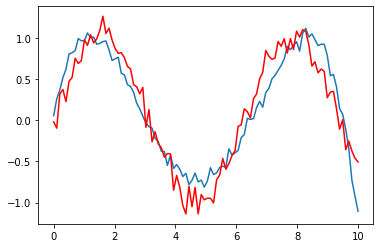

In [7]:
# add precision measure
var = 1/len(X) * ((Y-W@X_feature)**2).sum()
plt.plot(X, np.dot(W, X_feature)+np.random.randn(100)*var)
plt.plot(X, Y, '-r')
plt.show()

#### 3.1.3 LMS algorithm P144,  no idea why it was divergent.

The weight is:  [[-8.72989487e-01 -1.37042845e+01 -1.29504517e+02 -1.27351335e+03]]


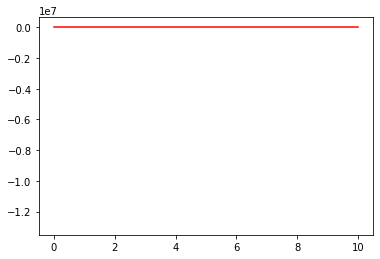

In [58]:
W = np.random.randn(1,4)
nabda = 1e-8
for index, data in enumerate(X_feature.T):
    data = data.reshape(4,1)
    W = W - (nabda*(Y[index]-W@data)*data).reshape(W.shape)
    
print("The weight is: ", W)
plt.plot(X[np.newaxis,:], np.dot(W, X_feature),'b')
plt.plot(X, Y, '-r')
plt.show()

#### 3.1.5 Mutiple outputs P146

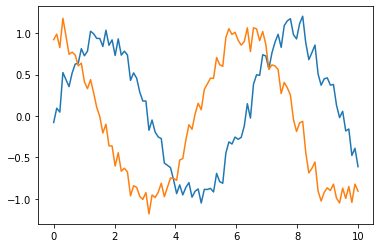

In [66]:
X = np.linspace(0,10,100)
w = np.random.randn(100) * 0.1 # variance 0.1, precision=10
Y1 = np.sin(X) + w
Y2 = np.cos(X) + w
Y = np.concatenate((Y1.reshape(100,1),Y2.reshape(100,1)), axis=1) # 100,2

plt.plot(X,Y1)
plt.plot(X,Y2)
plt.show()

The weight is:  [[ 2.22132547e+00  2.14960798e+00]
 [-1.42816630e+00 -2.27798544e+00]
 [ 2.84896245e-01  7.10009049e-01]
 [-2.09112818e-02 -8.51414132e-02]
 [ 4.38187023e-04  3.47311001e-03]]


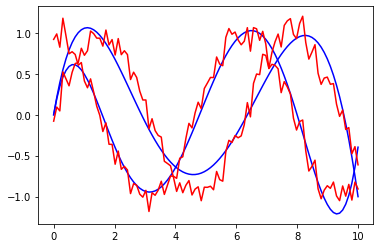

In [76]:
# feature space: (x, x**2, x**3, x**4, x**5), W.shape= (1,5) 
X_feature = np.array([X, X**2,X**3, X**4, X**5]) # here we need 5 dim feature to capture 2 output simutaneously.

# maximun likelihood solution
W = np.linalg.inv(X_feature@X_feature.T)@X_feature@Y
print("The weight is: ", W)
plt.plot(X, np.dot(W.T, X_feature)[0,:], '-b')
plt.plot(X, np.dot(W.T, X_feature)[1,:],'-b')
plt.plot(X, Y[:,0], '-r')
plt.plot(X, Y[:,1], '-r')
plt.show()